In [1]:
import psycopg2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from tqdm import tqdm # type: ignore
import numpy as np # type: ignore
config = {
    "host": "10.188.200.16",
    "dbname": "tw",
    "user": "jimmy",
    "password": "123123"
}
conn = psycopg2.connect(**config)
cursor = conn.cursor()

# price
sqlStr = """
SELECT DISTINCT p.da, p.nav, p.code, m.fund_type_code
FROM maincode_fund AS m
LEFT JOIN price_fund AS p ON p.code = m.code
WHERE p.da >= '2016-01-01' and m.year = '2025'
ORDER BY p.code, p.da DESC;
"""
cursor.execute(sqlStr)
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ["da", "nav", "code", "fund_type"]
fund_type_list = list(set(df.fund_type))

# fund type to be of stocks
sqlStr = """
SELECT distinct fund_type_code
FROM maincode_fund
WHERE year = '2025' 
AND fund_type LIKE '%股票%'
ORDER BY fund_type_code;
"""
cursor.execute(sqlStr)
conn.commit()
res = cursor.fetchall()
list_stock_fundtype = [i[0] for i in res]

In [ ]:
# tw maindcode_etf_offshore
sqlStr = """

"""
cursor.execute()

In [1]:
from ibapi.client import *
from ibapi.wrapper import *
import datetime
import time
import threading


from ibapi.contract import Contract
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
import psycopg2
from time import sleep
import pandas as pd
port = 7496

class TestApp(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self, self)
        self.orderId = 0
        self.list_ = []
        etf = pd.read_csv("a.csv")
        self.etfList = list(etf.code)[:]
        self.index = 0
        self.curCode = self.etfList[self.index]
        # self.tw_maincode_offshore_list = 
    def nextValidId(self, orderId):
        self.orderId = orderId
    def nextId(self):
        self.orderId += 1
        return self.orderId

    def error(self, reqId, errorCode, errorString, advancedOrderReject=""):
        print(f"reqId: {reqId}, errorCode: {errorCode}, errorString: {errorString}, orderReject: {advancedOrderReject}")

    def historicalData(self, reqId, bar):
        bar = bar.to_dict()
        bar['symbol'] = self.curCode
        self.list_.append(bar)
    def historicalDataEnd(self, reqId, start, end):
        self.cancelHistoricalData(reqId)
        self.index += 1
        self.curCode = self.etfList[self.index]
    def loop(self):
        for i in self.etfList:
            mycontract = Contract()
            mycontract.symbol = i
            mycontract.secType = "STK"
            mycontract.exchange = "SMART"
            mycontract.currency = "USD"
            nextId = app.nextId()
            app.reqHistoricalData(nextId, mycontract, "20250120 09:00:00 US/Eastern", "3 W", "1 day", "TRADES", 1, 1, False, [])
app = TestApp()
app.connect("127.0.0.1", port, 0)
threading.Thread(target=app.run).start()
time.sleep(1)

reqId: -1, errorCode: 2104, errorString: Market data farm connection is OK:usfarm.nj, orderReject: 
reqId: -1, errorCode: 2104, errorString: Market data farm connection is OK:usfuture, orderReject: 
reqId: -1, errorCode: 2104, errorString: Market data farm connection is OK:cashfarm, orderReject: 
reqId: -1, errorCode: 2104, errorString: Market data farm connection is OK:usfarm, orderReject: 
reqId: -1, errorCode: 2106, errorString: HMDS data farm connection is OK:euhmds, orderReject: 
reqId: -1, errorCode: 2106, errorString: HMDS data farm connection is OK:cashhmds, orderReject: 
reqId: -1, errorCode: 2106, errorString: HMDS data farm connection is OK:fundfarm, orderReject: 
reqId: -1, errorCode: 2106, errorString: HMDS data farm connection is OK:ushmds, orderReject: 
reqId: -1, errorCode: 2158, errorString: Sec-def data farm connection is OK:secdefnj, orderReject: 


reqId: 2, errorCode: 2176, errorString: Warning: Your API version does not support fractional share size rules. Please upgrade to a minimum version 163. Trimmed value 127.61 to 127, orderReject: 
reqId: 3, errorCode: 2176, errorString: Warning: Your API version does not support fractional share size rules. Please upgrade to a minimum version 163. Trimmed value 19084.88 to 19084, orderReject: 
reqId: 4, errorCode: 2176, errorString: Warning: Your API version does not support fractional share size rules. Please upgrade to a minimum version 163. Trimmed value 9.9 to 9, orderReject: 
reqId: 5, errorCode: 2176, errorString: Warning: Your API version does not support fractional share size rules. Please upgrade to a minimum version 163. Trimmed value 537.33 to 537, orderReject: 
reqId: 6, errorCode: 2176, errorString: Warning: Your API version does not support fractional share size rules. Please upgrade to a minimum version 163. Trimmed value 6850.89 to 6850, orderReject: 
reqId: 7, errorCode

In [ ]:
app.loop()

In [ ]:
te = pd.DataFrame(app.list_)
k = list(set(te['symbol']))
len(te), len(k)
te_f = te.drop_duplicates(subset=["symbol", "date"])
te_f = te_f.iloc[:, [0,1, 2, 3, 4, -1]]
te_f.to_parquet("2025_v1_tickers_test.parquet")
len(te), len(te_f)

In [ ]:
import psycopg2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from tqdm import tqdm # type: ignore
import numpy as np # type: ignore
config = {
    "host": "10.188.200.16",
    "dbname": "us",
    "user": "jimmy",
    "password": "123123"
}
conn = psycopg2.connect(**config)
cursor = conn.cursor()

# price
sqlStr = """
CREATE TABLE price_ib (
    da DATE NOT NULL,                 
    op DOUBLE PRECISION NOT NULL,     
    hi DOUBLE PRECISION NOT NULL,     
    lo DOUBLE PRECISION NOT NULL,     
    cl DOUBLE PRECISION NOT NULL,     
    vol DOUBLE PRECISION NOT NULL,    
    code CHAR(50) NOT NULL,           
    PRIMARY KEY (code, da),           
    CHECK (op >= 0),                  
    CHECK (hi >= 0),                  
    CHECK (lo >= 0),                  
    CHECK (cl >= 0),                  
    CHECK (vol >= 0)                  
);
"""
cursor.execute(sqlStr)
conn.commit()

sqlStr = f"""
    INSERT INTO price_ib (da, op, hi, lo, cl, vol, code)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
"""
# Convert DataFrame rows to tuples and execute the query
try:
    cursor.executemany(sqlStr, te_f)
    conn.commit()
    print("Data inserted successfully!")
except Exception as e:
    conn.rollback()
    print(f"Error: {e}")


In [15]:
te_f[te_f['symbol'] == "AAA"].set_index("date")

,open,high,low,close,symbol
date,,,,,
20241230,25.06,25.13,25.05,25.11,AAA
20241231,25.11,25.13,25.05,25.07,AAA
20250102,25.13,25.14,25.06,25.10,AAA
20250103,25.14,25.14,25.06,25.12,AAA
20250106,25.15,25.15,25.07,25.15,AAA
20250107,25.14,25.15,25.08,25.13,AAA
20250108,25.15,25.16,25.05,25.13,AAA
20250110,25.13,25.28,25.04,25.15,AAA
20250113,25.40,25.40,25.10,25.21,AAA


<Axes: xlabel='date'>

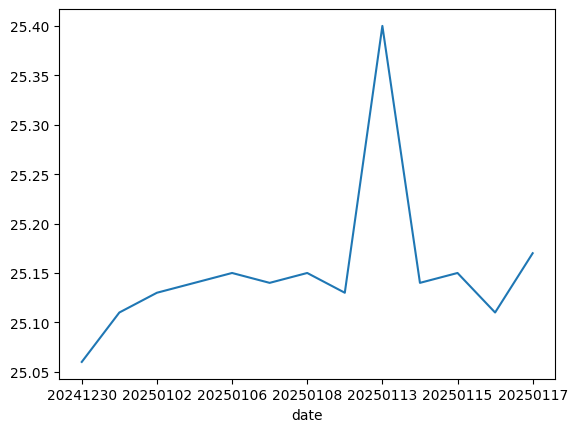

In [11]:
te_f[te_f['symbol'] == "AAA"].set_index("date").open.plot()

In [7]:
te_f

,date,open,high,low,close,volume,barCount,average,symbol
0,20241230,25.06,25.13,25.05,25.11,127,45,25.076,AAA
1,20241231,25.11,25.13,25.05,25.07,427,112,25.114,AAA
2,20250102,25.13,25.14,25.06,25.10,128,21,25.101,AAA
3,20250103,25.14,25.14,25.06,25.12,278,69,25.123,AAA
4,20250106,25.15,25.15,25.07,25.15,139,45,25.118,AAA
...,...,...,...,...,...,...,...,...,...
51291,20250113,51.32,51.38,51.32,51.38,1,1,51.320,EBLU
51292,20250114,52.00,52.02,51.86,51.86,3,3,52.010,EBLU
51293,20250115,53.54,53.54,53.54,53.54,0,0,53.540,EBLU
51294,20250116,53.52,53.52,53.52,53.52,0,0,53.520,EBLU


In [ ]:
# test for missed symbols
k = list(set(te['symbol']))
for i in app.etfList[:]:
    if i not in k: print(i)

In [ ]:
mycontract = Contract()
mycontract.symbol = "AAA"
mycontract.secType = "STK"
mycontract.exchange = "SMART"
mycontract.currency = "USD"
app.reqHistoricalData(app.nextId(), mycontract, "20250120 09:00:00 US/Eastern", "1 Y", "1 day", "TRADES", 1, 1, False, [])
